In [2]:
import pickle
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

In [3]:
#Import CoinAPI price data
priceFile = open("PRICES.txt", "rb")
pricesResponse = pickle.load(priceFile)
prices = pd.DataFrame.from_dict(pricesResponse.json())

In [ ]:
#Import Binance API price data
priceFile = open("PRICES_-1.txt", "rb")
pricesResponse = pickle.load(priceFile)
prices = pd.DataFrame.from_dict(pricesResponse.json())

In [4]:
prices

,time_period_start,time_period_end,time_open,time_close,rate_open,rate_high,rate_low,rate_close
0,2022-04-01T00:00:00.0000000Z,2022-04-01T00:05:00.0000000Z,2022-04-01T00:00:00.0000000Z,2022-04-01T00:04:00.0000000Z,3279.984979,3283.887269,3276.105218,3283.887269
1,2022-04-01T00:05:00.0000000Z,2022-04-01T00:10:00.0000000Z,2022-04-01T00:05:00.0000000Z,2022-04-01T00:09:00.0000000Z,3286.966901,3290.281811,3286.966901,3290.281811
2,2022-04-01T00:10:00.0000000Z,2022-04-01T00:15:00.0000000Z,2022-04-01T00:10:00.0000000Z,2022-04-01T00:14:00.0000000Z,3292.566477,3293.938666,3287.320448,3293.938666
3,2022-04-01T00:15:00.0000000Z,2022-04-01T00:20:00.0000000Z,2022-04-01T00:15:00.0000000Z,2022-04-01T00:19:00.0000000Z,3293.718140,3293.718140,3291.376920,3291.376920
4,2022-04-01T00:20:00.0000000Z,2022-04-01T00:25:00.0000000Z,2022-04-01T00:20:00.0000000Z,2022-04-01T00:24:00.0000000Z,3289.289923,3293.823135,3289.289923,3293.823135
...,...,...,...,...,...,...,...,...
17275,2022-05-30T23:35:00.0000000Z,2022-05-30T23:40:00.0000000Z,2022-05-30T23:35:00.0000000Z,2022-05-30T23:39:00.0000000Z,1993.328431,1993.328431,1991.957896,1992.162514
17276,2022-05-30T23:40:00.0000000Z,2022-05-30T23:45:00.0000000Z,2022-05-30T23:40:00.0000000Z,2022-05-30T23:44:00.0000000Z,1993.205264,1995.663311,1993.074735,1993.074735
17277,2022-05-30T23:45:00.0000000Z,2022-05-30T23:50:00.0000000Z,2022-05-30T23:45:00.0000000Z,2022-05-30T23:49:00.0000000Z,1993.914274,1993.914274,1991.981685,1991.981685
17278,2022-05-30T23:50:00.0000000Z,2022-05-30T23:55:00.0000000Z,2022-05-30T23:50:00.0000000Z,2022-05-30T23:54:00.0000000Z,1991.975822,1996.060805,1991.975822,1996.060805


In [5]:
trainingNum = int(len(prices) * 0.75)
trainingData = prices[:trainingNum]
testData = prices[trainingNum:]

In [6]:
trainingData

,time_period_start,time_period_end,time_open,time_close,rate_open,rate_high,rate_low,rate_close
0,2022-04-01T00:00:00.0000000Z,2022-04-01T00:05:00.0000000Z,2022-04-01T00:00:00.0000000Z,2022-04-01T00:04:00.0000000Z,3279.984979,3283.887269,3276.105218,3283.887269
1,2022-04-01T00:05:00.0000000Z,2022-04-01T00:10:00.0000000Z,2022-04-01T00:05:00.0000000Z,2022-04-01T00:09:00.0000000Z,3286.966901,3290.281811,3286.966901,3290.281811
2,2022-04-01T00:10:00.0000000Z,2022-04-01T00:15:00.0000000Z,2022-04-01T00:10:00.0000000Z,2022-04-01T00:14:00.0000000Z,3292.566477,3293.938666,3287.320448,3293.938666
3,2022-04-01T00:15:00.0000000Z,2022-04-01T00:20:00.0000000Z,2022-04-01T00:15:00.0000000Z,2022-04-01T00:19:00.0000000Z,3293.718140,3293.718140,3291.376920,3291.376920
4,2022-04-01T00:20:00.0000000Z,2022-04-01T00:25:00.0000000Z,2022-04-01T00:20:00.0000000Z,2022-04-01T00:24:00.0000000Z,3289.289923,3293.823135,3289.289923,3293.823135
...,...,...,...,...,...,...,...,...
12955,2022-05-15T23:35:00.0000000Z,2022-05-15T23:40:00.0000000Z,2022-05-15T23:35:00.0000000Z,2022-05-15T23:39:00.0000000Z,2134.017539,2136.096242,2133.674050,2136.096242
12956,2022-05-15T23:40:00.0000000Z,2022-05-15T23:45:00.0000000Z,2022-05-15T23:40:00.0000000Z,2022-05-15T23:44:00.0000000Z,2136.006334,2141.776413,2136.006334,2141.776413
12957,2022-05-15T23:45:00.0000000Z,2022-05-15T23:50:00.0000000Z,2022-05-15T23:45:00.0000000Z,2022-05-15T23:49:00.0000000Z,2142.102258,2146.915677,2141.833742,2141.833742
12958,2022-05-15T23:50:00.0000000Z,2022-05-15T23:55:00.0000000Z,2022-05-15T23:50:00.0000000Z,2022-05-15T23:54:00.0000000Z,2141.604281,2148.705284,2141.604281,2148.705284


In [7]:
#Parse Coin API data
priceIntervals = []
for i in trainingData.index:
  priceIntervals.append(trainingData['rate_open'][i])
  priceIntervals.append(trainingData['rate_close'][i])
priceIntervals = pd.Series(priceIntervals)

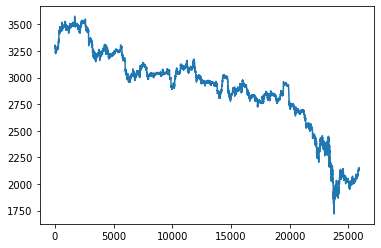

In [8]:
plt.plot(priceIntervals)

In [9]:
augmentedDickeyFullerResultPrices = adfuller(priceIntervals)
print('ADF Statistic: ', augmentedDickeyFullerResultPrices[0])
print('p-value: ', augmentedDickeyFullerResultPrices[1])

ADF Statistic:  -0.21508590475723305
p-value:  0.9366993648491632


In [10]:
#There are 288 5-minute intervals in 24 hours (12 5-minute intervals per hour times 24 hours)
#priceIntervals has 2 data points for each 5-minute interval, the rate_close of the previous and the rate_open of the next
dailyRealizedPower = []
for i in range(45):
  #45 days in trainingData
  accumulatingRealizedPower = 0
  for j in range(288):
    #288 5-minute intervals in each day
    index = 576 * i + 2 * j
    accumulatingRealizedPower = abs(math.log(priceIntervals[index + 1]) - math.log(priceIntervals[index]))
  dailyRealizedPower.append(accumulatingRealizedPower)
dailyRealizedPower = pd.Series(dailyRealizedPower)

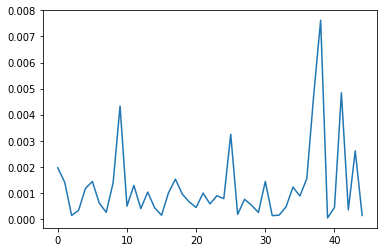

In [11]:
plt.plot(dailyRealizedPower)

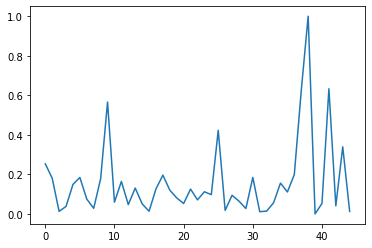

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaledDailyRealizedPower = scaler.fit_transform(dailyRealizedPower.to_frame())
plt.plot(scaledDailyRealizedPower)

In [13]:
augmentedDickeyFullerResultPower = adfuller(scaledDailyRealizedPower.flatten())
print('ADF Statistic: ', augmentedDickeyFullerResultPower[0])
print('p-value: ', augmentedDickeyFullerResultPower[1])

ADF Statistic:  -5.8218717369440425
p-value:  4.16474569018591e-07
